### 데이터 라벨링을 위한 클러스터링 작업
* 시간을 기준으로 군집화하고
 * mean-shift라는 unsupervised clustering
* 공간을 기준으로 군집화한다. 
 * k-means로 클러스터링한다. 
 * 클러스터링 된 공간에 대하여 수작업으로 라벨링한다. 
 
 

In [1]:
from os import listdir
import os
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
import pandas as pd
%matplotlib inline
import random
import numpy as np

sns.set(style="whitegrid", palette="pastel", color_codes=True, font_scale=1.4)
rcParams['font.family'] = 'NanumGothic'

In [5]:
pic_ds = pd.read_pickle('./resource/pic_ds.pkl')

## 기간에 따른 클러스터링 
* mean-shift

In [14]:
from IPython.display import Image, HTML, display
from glob import glob

def drawImages(imagePathList, size='120px'):
    imgtag = "<img style='height: "+size+"; margin: 0px; float: left; border: 1px solid black;' src='%s' />"
    imagesList=''.join( [ imgtag % str(s) 
                         for s in imagePathList ])
    
    display(HTML(imagesList))

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth

date_array = pic_ds.apply( lambda x : (x.year-2012)*365+x.year_day, axis=1).values
date_array = date_array.reshape(len(date_array),1)

In [12]:
ms = MeanShift(bandwidth=.2, bin_seeding=True)
ms.fit(date_array)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 277


In [24]:
sample_pics = []
minor_pics = []
clustered_ds = pd.DataFrame([ a for a in zip(labels,pic_ds.index, pic_ds['datetime']) ], columns=['cluster','img_path','date'] )
for (key, ds) in clustered_ds[:].groupby('cluster'):
    print("cluser = %d, image=%d : %s ~ %s" % (key, len(img_list), ds['date'].min() , ds['date'].max()) )
    image_path = [ './resource/photo/'+img for img in  ds['img_path'].values.tolist()]
    random.shuffle(image_path)
    drawImages(image_path[:5])
    
    if key > 10:
        break

cluser = 0, image=24 : 2016-04-21 08:32:06 ~ 2016-04-21 20:08:26


cluser = 1, image=24 : 2016-04-22 16:36:28 ~ 2016-04-22 19:51:16


cluser = 2, image=24 : 2016-04-19 07:43:35 ~ 2016-04-19 18:32:39


cluser = 3, image=24 : 2015-10-24 20:12:20 ~ 2015-10-24 20:22:10


cluser = 4, image=24 : 2016-04-20 07:42:23 ~ 2016-04-20 16:23:33


cluser = 5, image=24 : 2016-02-10 14:24:57 ~ 2016-02-10 18:58:57


cluser = 6, image=24 : 2016-04-29 11:46:22 ~ 2016-04-29 19:18:51


cluser = 7, image=24 : 2016-03-27 13:17:50 ~ 2016-03-27 13:53:39


cluser = 8, image=24 : 2014-07-01 21:39:05 ~ 2014-07-01 21:41:12


cluser = 9, image=24 : 2016-02-05 17:16:55 ~ 2016-02-05 20:40:06


cluser = 10, image=24 : 2016-04-23 10:41:13 ~ 2016-04-23 10:59:34


cluser = 11, image=24 : 2016-04-13 18:56:59 ~ 2016-04-13 19:07:15


In [258]:
import seaborn as sns

## 다듬어진 Violin Plotting하기 
def drawYearKde(ds, x, y, hue, label=None, figsize=(14,6), order=None, scale='width') :
    sns.set(style="whitegrid", palette="colorblind", font_scale=1.4, rc={'font.family':'NanumGothic'} )
    plt.figure(figsize=figsize)
    order_list = order or ds.groupby(y).count().sort(x, ascending=False).index.tolist()
    
    ## ploting
    g = sns.violinplot(data=ds, x=x, y=y, hue=hue, scale=scale, orient='h'
                       , cut=2, split=True, inner='box', bw='silverman'
                       
                      )
    plt.tick_params(labeltop='on')

    if label != None:
        ## x ticks
        label_ds = ds.groupby(label).max()
        x_index = label_ds[x].values.tolist()
        x_label = label_ds.index.tolist()
        plt.xticks(x_index, x_label, rotation='vertical')

    plt.xlabel('')
    plt.ylabel('')
    

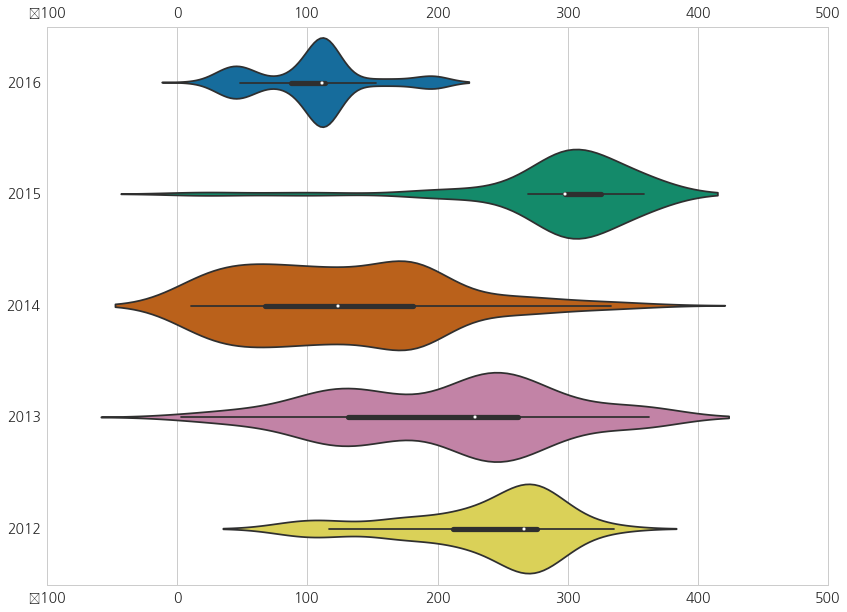

In [259]:
drawYearKde(pic_ds, x='year_day', y='year', hue=None, label=None, figsize=(14,10))

### 데이터에 라벨링 
* 지역 기반으로 라벨링 
* 시간 기반으로 라벨링

In [260]:
def drawVlinePlot(x, title, xticks=None):
    ax = plt.figure(figsize=(10,1.5))
    plt.vlines(x, [0], 1, alpha=0.7, linewidth=1.5, color='k')
    #plt.vlines([np.median(x)], [0], 1, alpha=1, linewidth=2, color='r')
    if xticks is not None:
        plt.xticks(xticks[0], xticks[1])
    plt.yticks([])
    size = len(x)
    #ylabel('{0}'.format(size))
    plt.title(title)
    plt.show()
    

In [261]:
## 년도별 사진을 찍은 산포도 

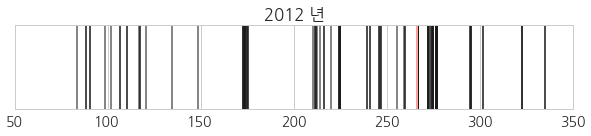

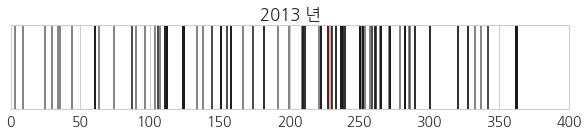

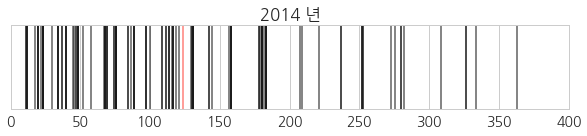

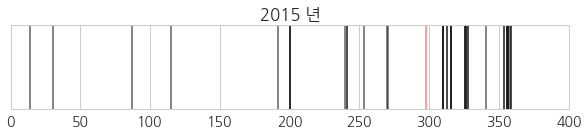

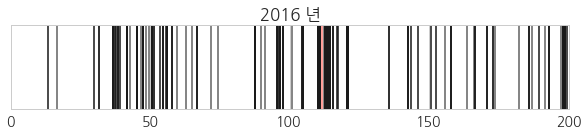

In [262]:
for year, ds in pic_ds.groupby('year'):
    drawVlinePlot(ds.year_day.values, "%d 년"%year)

In [ ]:
## 이미지 사이즈별 구분하여 샘플링

In [248]:
from IPython.display import Image, HTML, display
from glob import glob

def drawImages(imagePathList, size='120px'):
    imgtag = "<img style='height: "+size+"; margin: 0px; float: left; border: 1px solid black;' src='%s' />"
    imagesList=''.join( [ imgtag % str(s) 
                         for s in imagePathList ])
    
    display(HTML(imagesList))

In [263]:
sample_pics = []
minor_pics = []
for (key, ds) in pic_ds.groupby(['resolution','model']):
    if ds.shape[0]>5 :
        sample_pics.append((key, [ './resource/photo/'+img for img in  ds.index.values.tolist()]))
    else :
        minor_pics.extend([ './resource/photo/'+img for img in  ds.index.values.tolist()])
sample_pics.append((('etc','none'),minor_pics))

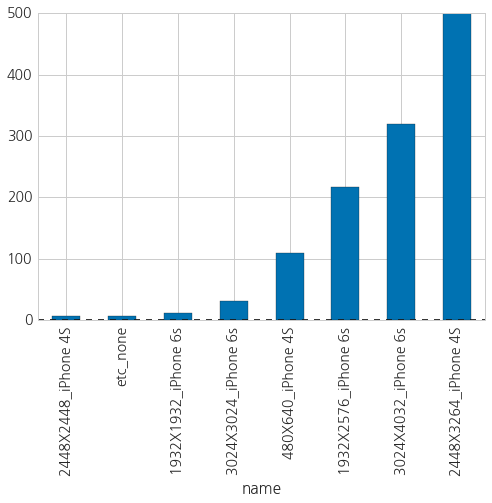

In [282]:
tmp_ds = pd.DataFrame([["_".join(key), len(images)] for (key, images) in sample_pics], columns='name count'.split())
tmp_ds.sort('count').plot(kind='bar' , x='name', y='count', legend=None)

In [279]:
import random
for (key, img_list) in sample_pics:
    print(key[0],key[1], len(img_list))
    random.shuffle(img_list)
    drawImages(img_list[:5])

1932X1932 iPhone 6s 12


1932X2576 iPhone 6s 216


2448X2448 iPhone 4S 7


2448X3264 iPhone 4S 500


3024X3024 iPhone 6s 31


3024X4032 iPhone 6s 320


480X640 iPhone 4S 109


etc none 7


In [202]:
pd.options.display.max_rows=100
pic_ds.groupby(['resolution','model']).count().sort('datetime', ascending=False).head(100)




,,datetime,latitude,longitude
resolution,model,,,
2448X3264,iPhone 4S,522,522,522
3024X4032,iPhone 6s,325,325,325
1932X2576,iPhone 6s,217,217,217
480X640,iPhone 4S,114,114,114
1836X1377,unknown,42,42,42
1836X2448,unknown,35,35,35
3024X3024,iPhone 6s,31,31,31
1000X1000,unknown,30,30,30
1X1,unknown,29,29,29
